# US Baby Names 1880-2010
* The United States Social Security Administration (SSA) provided the data on the frequency of baby names from 1880 till now
* We will do some data manipulation on this dataset:

    1. Visualize the proportion of babies given a particular names
    2. Relative rank of a name
    3. Determine the most populat names in each year
    4. Trends in names
    5. External sources of trends

In [50]:
import pandas as pd 
import numpy as np

## Read Data from several text

In [1]:
%ls ./data/babynames/ ## list of all data

NationalReadMe.pdf* yob1912.txt*        yob1945.txt*        yob1978.txt*
yob1880.txt*        yob1913.txt*        yob1946.txt*        yob1979.txt*
yob1881.txt*        yob1914.txt*        yob1947.txt*        yob1980.txt*
yob1882.txt*        yob1915.txt*        yob1948.txt*        yob1981.txt*
yob1883.txt*        yob1916.txt*        yob1949.txt*        yob1982.txt*
yob1884.txt*        yob1917.txt*        yob1950.txt*        yob1983.txt*
yob1885.txt*        yob1918.txt*        yob1951.txt*        yob1984.txt*
yob1886.txt*        yob1919.txt*        yob1952.txt*        yob1985.txt*
yob1887.txt*        yob1920.txt*        yob1953.txt*        yob1986.txt*
yob1888.txt*        yob1921.txt*        yob1954.txt*        yob1987.txt*
yob1889.txt*        yob1922.txt*        yob1955.txt*        yob1988.txt*
yob1890.txt*        yob1923.txt*        yob1956.txt*        yob1989.txt*
yob1891.txt*        yob1924.txt*        yob1957.txt*        yob1990.txt*
yob1892.txt*        yob1925.txt*        yob1958.txt

In [2]:
!head -n 10 ./data/babynames/yob1880.txt

In [11]:
## Read a text file by pandas
names_1980 = pd.read_csv('./data/babynames/yob1880.txt', names=['name','sex','births'])
names_1980.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [13]:
## Tricks to read mutiple sets
years = range(1880, 2011)
pieces = []
columns = ['name','sex','births']

for year in years:
    path = './data/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year 
    pieces.append(frame)

In [16]:
## Concat everything
names = pd.concat(pieces, ignore_index=True)

In [23]:
names.shape

(1690784, 4)

In [24]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## Aggregate: Pivot Table

In [26]:
total_births = names.pivot_table(values='births', index='year', columns='sex', aggfunc='sum')
total_births.tail() ## recent years

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


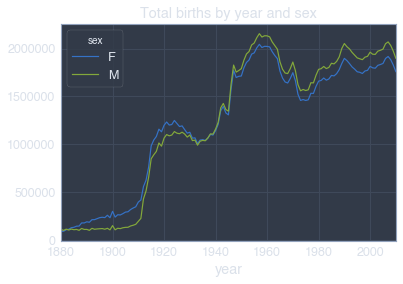

In [27]:
total_births.plot(title='Total births by year and sex')

## Manipulation by Groups

In [30]:
## add column 'prop' the fraction of babies given each name relative to the total number of birth
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop) 

In [31]:
names.head() 

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [37]:
## sanity check the sum of prop in name should be equal 1
names.groupby(['year','sex']).prop.sum().head() 

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

In [35]:
## get top 1000 names by each combination of sex/year
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year','sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [36]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


## Trends by Time

In [38]:
boys = top1000[top1000.sex == 'M'] ## top 1000 of boys
girls = top1000[top1000.sex == 'F'] ## top 1000 of girls

In [41]:
## pivot total births by year and name
total_births = top1000.pivot_table(values='births', index='year', columns='name', aggfunc='sum')
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


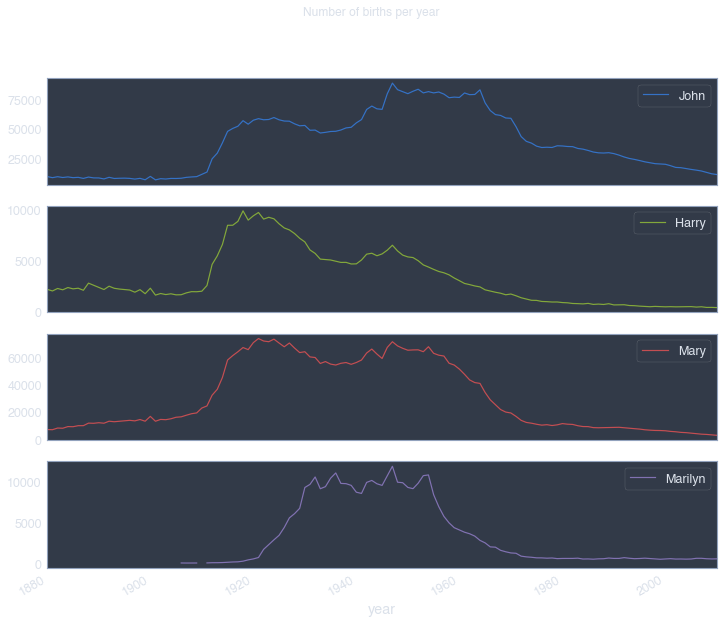

In [43]:
subset_name = total_births[['John','Harry','Mary','Marilyn']]
subset_name.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year');  

## Measure the Naming Diversity

In [45]:
## check the sum prop of top 1000 most common names
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [51]:
top1000_prop = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
top1000_prop.head()

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


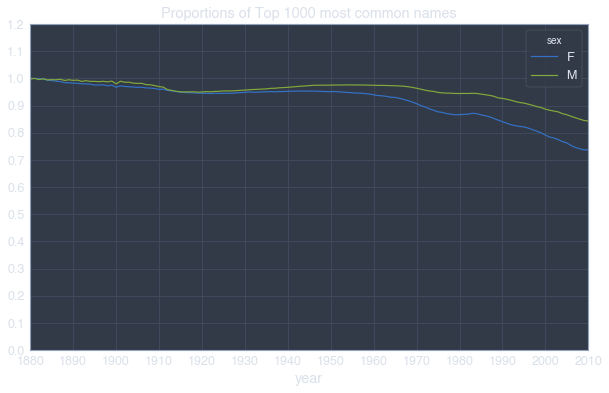

In [54]:
top1000_prop.plot(title='Proportions of Top 1000 most common names',
                 yticks=np.linspace(0, 1.2, 13),
                 xticks=range(1880, 2020, 10),
                 figsize=(10,6))

In [56]:
## Boys names in 2010
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [59]:
prop_cumsum.values.searchsorted(0.5) + 1 
## return the position where the cum_prop = 0.5 to compute the distinct name account
## for 50% quantile

117

In [60]:
## similar metrics in 1900
df = boys[boys.year == 1900]
prop_cumsum_1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum_1900.values.searchsorted(0.5) + 1

25

In [64]:
## get the quantile by group
def get_quantile_count(group, qtile = 0.5):
    prop_cumsum = group.sort_values(by='prop', ascending=False).prop.cumsum()
    return prop_cumsum.searchsorted(qtile) + 1 

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

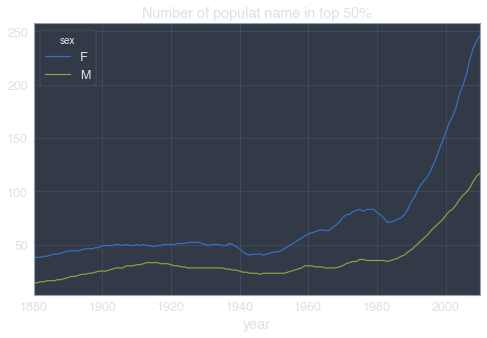

In [68]:
diversity.plot(title='Number of populat name in top 50%', figsize=(8,5));

## "Last letter" Revolution

In [69]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [71]:
# extract last letter from the name 
get_last_letter = lambda x: x[-1]
names['last_letter'] = names.name.map(get_last_letter)

In [75]:
table = names.pivot_table('births', index='last_letter', columns=['sex','year'], aggfunc='sum')
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  

[5 rows x 262 columns]

In [76]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [77]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [80]:
letter_prop = subtable / subtable.sum() ## only normalize within the subtable
letter_prop ## auto divide corresponding to indices

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

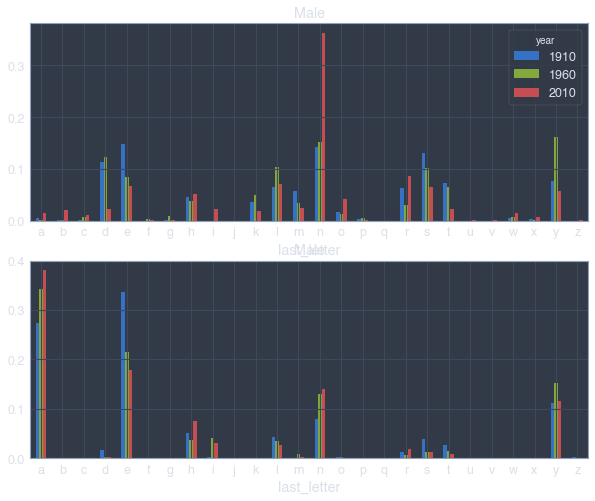

In [85]:
## plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1, figsize=(10,8)) # 2 rows x 1 column
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Male', legend=False); 

In [91]:
## Normalize in the full table
table_letter_prop = table / table.sum()
dny_male_ts = table_letter_prop.loc[['d','n','y'],'M'].T

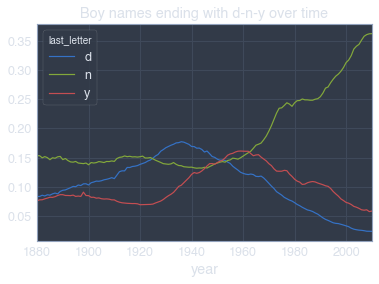

In [94]:
dny_male_ts.plot(title='Boy names ending with d-n-y over time');  

## Boy name becomes Girl name

In [97]:
all_names = pd.Series(top1000.name.unique())
## filter name contains 'lesl'
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like.head()

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [103]:
## count the number of birht within each
top1000_filtered = top1000[top1000['name'].isin(lesley_like)]
top1000_filtered.groupby('name').births.sum() ## sum by name

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [108]:
pivot_tab = top1000_filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
pivot_tab_prop = pivot_tab.div(pivot_tab.sum(1), axis=0)
pivot_tab_prop.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


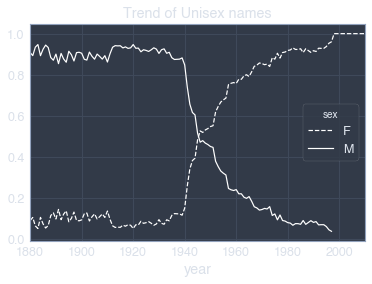

In [111]:
## plot it
pivot_tab_prop.plot(style={'M': 'w-', 'F': 'w--'}, title='Trend of Unisex names');